## Image segmentation test

In [9]:
import sys
import cv2
import time
import colorsys
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
model = tf.keras.models.load_model('../models/128x128_acc_0.9304_loss_0.1065_val-acc_0.9306_val-loss_0.1043_1M_23607-21/')

In [11]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
sequential_37 (Sequential)      (None, 64, 64, 32)   1536        input_10[0][0]                   
__________________________________________________________________________________________________
sequential_38 (Sequential)      (None, 32, 32, 64)   32896       sequential_37[0][0]              
__________________________________________________________________________________________________
sequential_39 (Sequential)      (None, 16, 16, 128)  131328      sequential_38[0][0]              
___________________________________________________________________________________________

In [12]:
def random_colors(N, bright=True):
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    return colors


def apply_mask(image, mask, color, alpha=0.5):
#     if image.shape[:2] != mask.shape:
#         h, w, _ = image.shape
#         mask = cv2.resize(mask, (w, h), cv2.INTER_LINEAR)
    """Apply the given mask to the image"""
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

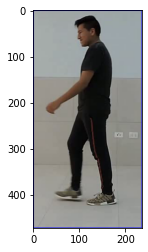

In [13]:
img = cv2.imread('../data/silhuette.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
# width, height = 160, 160
width, height = 128, 128

def inference(img):
    start = time.time()
#     img = frame[50:200,230:,::-1]
    tf_image = tf.image.resize(tf.convert_to_tensor(np.array(img)),(width, height))/255
    output = model.predict(tf.expand_dims(tf_image, 0))
#     output = model.predict(tf.stack([tf_image, tf_image, tf_image, tf_image, tf_image]))
    out = np.where(output[0,:,:,0]>0.3, 1, 0)
    end = time.time()
    print(end - start)
    return out
#     plt.figure(figsize=(10,10))
#     plt.imshow(out, 'gray')
#     plt.show()

0.17006826400756836


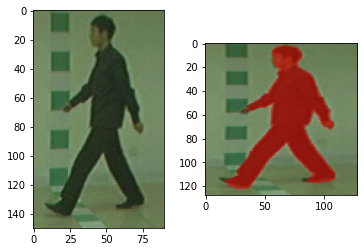

In [15]:
cap = cv2.VideoCapture('../data/videos/001-nm-01-090.avi')
cap.set(cv2.CAP_PROP_POS_FRAMES, 50)
ret, frame = cap.read()

roi = frame[50:200,230:,::-1]
color = random_colors(1)
roi_resized = cv2.resize(roi, (width, height), cv2.INTER_LINEAR)
pred = inference(roi)
out = apply_mask(roi_resized, pred, color[0])
plt.subplot(121); plt.imshow(roi); 
plt.subplot(122); plt.imshow(out);
cap.release()

In [16]:
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

frame_height, frame_width,_ = frame.shape
out_cap = cv2.VideoWriter('CASIA_dataset.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))


cap = cv2.VideoCapture('../data/videos/001-nm-01-090.avi')
# cap = cv2.VideoCapture('/home/israel/Downloads/CASIA/DatasetB-1/video/')
roi = np.zeros((100,100))
color = random_colors(1)

cv2.namedWindow('roi', cv2.WINDOW_NORMAL)
nframe = 0
start = time.time()
fps = 30
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        copied = frame.copy()
        regions, _ = hog.detectMultiScale(frame, winStride=(8, 8)) 
        for (x, y, w, h) in regions: 
            roi = copied[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (width, height), cv2.INTER_LINEAR)
            if nframe%1 == 0:
                pred = inference(roi)
#             pred = lite_inference(roi)
            out = apply_mask(roi_resized, pred, color[0])
            copied[y:y+h, x:x+w] = cv2.resize(out, (w, h), cv2.INTER_LINEAR)
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2) 
            
#         cv2.imshow('test', frame)
        
        cv2.putText(copied, "fps: {:.2f}".format(fps), (5, 20), cv2.FONT_ITALIC, 0.5, (255, 0, 0))
        cv2.imshow('roi', copied)
        out_cap.write(copied)
        nframe +=1
        end = time.time()
        fps = nframe/(end - start)
    else:
        break
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
out_cap.release()
cv2.destroyAllWindows()

0.04770040512084961
0.03952741622924805
0.0767667293548584
0.06493639945983887
0.07517504692077637
0.06415891647338867
0.046898603439331055
0.03712892532348633
0.03643083572387695
0.03747224807739258
0.03720736503601074
0.04936075210571289
0.04950833320617676
0.03563642501831055
0.04011654853820801
0.22878360748291016
0.042153120040893555
0.0389561653137207
0.04052567481994629
0.03944969177246094
0.03546929359436035
0.03652787208557129
0.04488015174865723
0.037904977798461914
0.03890824317932129
0.04089474678039551
0.038469791412353516
0.03905081748962402
0.04141521453857422
0.036002397537231445
0.04203653335571289
0.04353833198547363
0.03612828254699707
0.03720498085021973
0.03851199150085449
0.03667187690734863
0.03598475456237793
0.04172921180725098
0.04293394088745117
0.0403141975402832
0.0410609245300293
0.03950381278991699
0.038992881774902344
0.03658318519592285
0.044502973556518555
0.041977882385253906
0.0410618782043457
0.04244685173034668
0.04097557067871094
0.042218446731567